# Import modules

In [1]:
# 한국어 폰트 다운로드
# 런타임 -->  세션 다시시작 필요

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and direc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter # element 개수 셀 때 사용
from wordcloud import WordCloud

In [2]:
!pip install konlpy
import konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 26.4 MB/s eta 0:00:00


In [3]:
# clustering
! pip install soyclustering
from sklearn.feature_extraction.text import CountVectorizer # 벡터화
from sklearn.feature_extraction.text import TfidfTransformer # tfidf
from soyclustering import SphericalKMeans # clustering

In [4]:
from google.colab import files
file = files.upload()

Saving naver_blog.json to naver_blog.json


## 데이터 읽어오기
블로그 신한생명 검색 결과로 저장한 json 파일을 읽어오시오

In [5]:
df_blog = pd.read_json("./naver_blog.json")
df_blog.head()

,title,link,description,bloggername,bloggerlink,postdate
0,뷰티풀 민트 라이프 2023 뮤직 페스티벌 뷰민라 <b>포스코</b> 팝업...,https://blog.naver.com/pih870318/223103807388,2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 ...,초코혜 365일 매일이 여행 ♪,blog.naver.com/pih870318,20230516
1,♣ 5월 <b>포스코</b> 그룹주 주가 흐름,https://blog.naver.com/photoman75/223101456174,"© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급...",숨 그리고 삶,blog.naver.com/photoman75,20230514
2,문현 <b>포스코</b> 센트럴포레 부적격세대 알아보세요,https://blog.naver.com/guen1600/223071175085,문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b...,돈 걱정 없는 인생 만들기,blog.naver.com/guen1600,20230411
3,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트,https://blog.naver.com/sanbok91/223086651151,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트 정부의 부동산 규제 완화책 ...,부동산스토리,blog.naver.com/sanbok91,20230427
4,문현 <b>포스코</b> 센트럴포레 부적격세대 현장소식,https://blog.naver.com/wpthdud0/223085508053,문현 센트럴포레 - 시공사 <b>포스코</b> 건설 2022년 4월 사업승인 신청을...,하하하이모의 부동산정보,blog.naver.com/wpthdud0,20230426


##### description 내용만 list로 반환

In [6]:
descriptions = df_blog["description"].to_list() # 블로그 내용
descriptions[0:3]

['2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 캐릭터 인증샷 이벤트까지... 이번 뷰티풀 민트 라이프 2023에는 게보린, <b>포스코</b>, 뮤직카우 등의 부스를 만날 수 있었는데요. 사실 <b>포스코</b>에서... ',
 '© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급이 몰리면서 급등한 후 4월 20일 이후 조정을 받으며 하락하고 있다. <b>포스코</b>인터내셔널은 <b>포스코</b>그룹주중에서 가장 늦게 발동이 걸리며 4월 13일 종가 22,250원... ',
 '문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b>포스코</b> 아파트는 부산광역시 남구 문현동 334번지 일원에 위치하는 지역주택조합 아파트입니다. <b>포스코</b> 건설이 시공할 예정이며... ']

## KoNLPy를 이용한 단어 분석
KoNLPy: 파이썬 한국어 NLP
- 형태소 분석
 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
 - Kkma: 꼬꼬마. 서울대학교 IDS 연구실 개발
 - Komoran: 코모란. Shineware에서 개발
 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

*참고: https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

##### Question: Okt를 활용하여 첫 번째 문장의 형태소를 분석해보자

In [7]:
# !pip install knolpy
from konlpy.tag import Okt

parser_kor = Okt()
parser_kor.pos(descriptions[0])[:10]

[('2023', 'Number'),
 ('뮤직', 'Noun'),
 ('페스티벌', 'Noun'),
 ('뷰민', 'Noun'),
 ('라', 'Josa'),
 ('뷰티풀', 'Noun'),
 ('민트', 'Noun'),
 ('라이프', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha')]

##### Question: descriptions의 모든 문장의 형태소를 분석해보자

In [8]:
morphs = []         # 단어를 담을 리스트
for sentence in descriptions:                     # 리스트에서 각 문장 추출
    morphs.append(parser_kor.pos(sentence))  # 문장별 형태소 분석 결과 추가

In [9]:
morphs[16]

[('오늘', 'Noun'),
 ('은', 'Josa'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('퓨처엠', 'Noun'),
 ('의', 'Josa'),
 ('PEG', 'Alpha'),
 ('에', 'Josa'),
 ('대해', 'Noun'),
 ('서', 'Josa'),
 ('이야기', 'Noun'),
 ('를', 'Josa'),
 ('해본다', 'Verb'),
 ('.', 'Punctuation'),
 ('PEG', 'Alpha'),
 ('=', 'Punctuation'),
 ('Price', 'Alpha'),
 ('Earing', 'Alpha'),
 ('to', 'Alpha'),
 ('Growth', 'Alpha'),
 ('rate', 'Alpha'),
 ('월', 'Noun'),
 ('가의', 'Noun'),
 ('...', 'Punctuation'),
 ('구분', 'Noun'),
 ('A', 'Alpha'),
 ('기업', 'Noun'),
 ('B', 'Alpha'),
 ('기업', 'Noun'),
 ('주가', 'Noun'),
 ('1000', 'Number'),
 ('1000', 'Number'),
 ('EPS', 'Alpha'),
 ('40', 'Number'),
 ('100', 'Number'),
 ('PER', 'Alpha'),
 ('25', 'Number'),
 ('10', 'Number'),
 ('EPSG', 'Alpha'),
 ('50%', 'Number'),
 ('10%', 'Number'),
 ('PEG', 'Alpha'),
 ('0.5', 'Number'),
 ('1', 'Number'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('

##### Question: descriptions의 모든 문장에서 명사만 추출해보자

In [10]:
noun_list=[]  # 명사만 모은 리스트
for wt in morphs: # description 별 pos tagging결과 # 리스트-문장 (pos)
    noun_list += [word for word, tag in wt if tag == 'Noun' ]

In [11]:
print(", ".join(noun_list))

뮤직, 페스티벌, 뷰민, 뷰티풀, 민트, 라이프, 포스코, 팝업, 포석, 호, 캐릭터, 인증샷, 이벤트, 이번, 뷰티풀, 민트, 라이프, 게보린, 포스코, 뮤직, 등, 부스, 만날, 수, 사실, 포스코, 출처, 포스코, 그룹, 주가, 이후, 수급, 급등, 후, 이후, 조정, 하락, 포스코, 인터내셔널, 포스코, 그룹, 주중, 가장, 발동, 종가, 현, 포스코, 센트럴, 포레, 부적, 격, 세대, 선착순, 공급, 안내, 현, 센트럴, 포레, 포스코, 아파트, 부산광역시, 남구, 문현동, 번지, 일원, 위치, 지역, 주택조합, 아파트, 포스코, 건설, 시공, 예정, 현, 포스코, 센트럴, 포레, 문현동, 마루, 아파트, 정부, 부동산, 규제, 완화, 책, 이후, 여러, 지표, 개선, 측면, 양호, 입지, 지역, 주택조합, 아파트, 현, 포스코, 센트럴, 포레, 소개, 현, 센트럴, 포레, 시공사, 포스코, 건설, 사업, 승인, 신청, 사업, 승인, 오늘, 중, 생활환경, 화제, 현, 포스코, 센트럴, 포레, 대해, 현, 포스코, 센트럴, 포레, 문현동, 아파트, 조합원, 선착순, 마루, 지역, 주택조합, 부산광역시, 남구, 문현동, 번지, 일원, 사업, 부지, 현, 포스코, 센트럴, 포레, 사업, 승인, 접수, 소식, 조합원, 자격, 현, 포스코, 센트럴, 포레, 문현동, 아파트, 분양, 정보, 부적, 격, 세대, 이번, 시즌, 가장, 핫, 곳, 수, 현, 포스코, 센트럴, 포레, 아파트, 공급, 소식, 마루, 지역, 주택조합, 부적, 격, 세대, 마지막, 포스코, 건설, 신규, 아파트, 연동, 더, 애비뉴, 공급, 제주, 연동, 포스코, 더, 주한, 병원, 주변, 위치, 것, 확인, 수, 주한, 병원, 포스코, 엠텍, 리튬, 리튬, 주, 말, 이, 회사, 철광석, 산소, 분리, 고순, 알루미늄, 탈산제, 직접, 생산, 기업, 포스코, 의, 직계, 회사, 중, 현, 포스코, 센트럴, 포레, 남구, 최, 중심, 위치, 현장, 면적, 제곱미터, 현, 포스코, 센트럴,

##### Question: 각 명사가 출현한 빈도를 체크해보자

In [12]:
Counter(noun_list).most_common(10)

[('포스코', 223),
 ('그룹', 23),
 ('사업', 23),
 ('홀딩스', 23),
 ('주가', 21),
 ('오늘', 17),
 ('주', 15),
 ('기업', 15),
 ('현', 13),
 ('센트럴', 13)]

##### Question: 2번이 넘게 나온 단어들 목록을 탐색하고, 불필요한 명사 리스트를 만들어보자

In [13]:
worddict = Counter(noun_list) # key : 단어, value : 등장횟수

over_2 = [k for k, v in worddict.items() if int(v)>2]
over_2

['포스코',
 '팝업',
 '이번',
 '등',
 '수',
 '사실',
 '그룹',
 '주가',
 '이후',
 '급등',
 '후',
 '하락',
 '인터내셔널',
 '가장',
 '현',
 '센트럴',
 '포레',
 '부적',
 '격',
 '세대',
 '공급',
 '안내',
 '아파트',
 '남구',
 '문현동',
 '번지',
 '일원',
 '위치',
 '지역',
 '주택조합',
 '건설',
 '예정',
 '마루',
 '정부',
 '소개',
 '시공사',
 '사업',
 '승인',
 '오늘',
 '중',
 '대해',
 '접수',
 '소식',
 '분양',
 '정보',
 '핫',
 '곳',
 '연동',
 '더',
 '제주',
 '병원',
 '것',
 '확인',
 '엠텍',
 '리튬',
 '주',
 '이',
 '회사',
 '기업',
 '의',
 '엠',
 '실적',
 '미래',
 '주식',
 '퓨처엠',
 '기록',
 '내',
 '스틸',
 '리온',
 '상한',
 '홀딩스',
 '케미칼',
 '부문',
 '별',
 '소재',
 '위',
 '상승',
 '인터네셔널',
 '그',
 '기술',
 '분석',
 '투자자',
 '최근',
 '에코',
 '프로',
 '개인',
 '매수',
 '섹터',
 '철강',
 '및',
 '시간',
 '분',
 '위해',
 '설명',
 '한국',
 '를',
 '최대',
 '건물',
 '퓨처',
 '패턴',
 '대한',
 '어제',
 '종목',
 '관련',
 '전',
 '전자',
 '포스팅',
 '한번',
 '프로비',
 '업체',
 '상승세',
 '배터리',
 '제',
 '시작',
 '다른',
 '공장',
 '주로',
 '장',
 '관심',
 '상생',
 '스마트',
 '지원',
 '사거리',
 '센터',
 '테라로사',
 '점',
 '때',
 '동탄',
 '대장',
 '한화',
 '길',
 '삼성',
 '타입',
 '금',
 '지난',
 '이차전지',
 '준비',
 '장주',
 '밸류',
 '체인',
 '날',
 '사진',
 '아주',
 

In [14]:
# 불필요한 명사 리스트
removelist = ['포스코', '것', '중', '수', '이', '등', '대해', '비', '더', '가기', '의',
              '또', '명', '후', '좀', '별', '율', '나', '분', '무', '및', '뷰', '엠','주', '현']

## WordCloud 만들기

##### Question: wordcloud 인스턴스 선언

In [15]:
# font_path = './NanumGothic.ttf'
# background_color='white'
# colormap = 'Accent_r'
# width = 800
# height = 800
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf', #한글 사용 위해서 /usr/share/fonts/truetype/nanum
    background_color='white',       # 배경 색깔 정하기
    colormap = 'Blues_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
    width = 800,
    height = 800
)

In [16]:
worddict

Counter({'뮤직': 2,
         '페스티벌': 1,
         '뷰민': 1,
         '뷰티풀': 2,
         '민트': 2,
         '라이프': 2,
         '포스코': 223,
         '팝업': 4,
         '포석': 1,
         '호': 1,
         '캐릭터': 1,
         '인증샷': 1,
         '이벤트': 1,
         '이번': 4,
         '게보린': 1,
         '등': 9,
         '부스': 1,
         '만날': 1,
         '수': 7,
         '사실': 3,
         '출처': 2,
         '그룹': 23,
         '주가': 21,
         '이후': 5,
         '수급': 1,
         '급등': 4,
         '후': 3,
         '조정': 1,
         '하락': 3,
         '인터내셔널': 12,
         '주중': 1,
         '가장': 5,
         '발동': 1,
         '종가': 1,
         '현': 13,
         '센트럴': 13,
         '포레': 13,
         '부적': 3,
         '격': 3,
         '세대': 3,
         '선착순': 2,
         '공급': 4,
         '안내': 3,
         '아파트': 12,
         '부산광역시': 2,
         '남구': 3,
         '문현동': 5,
         '번지': 4,
         '일원': 3,
         '위치': 8,
         '지역': 8,
         '주택조합': 5,
         '건설': 10,
         '시공': 2,
   

##### Question: worddict을 이용하여 wordcloud 생성

In [17]:
wordcloud.generate_from_frequencies(worddict)

##### Question: wordcloud 출력

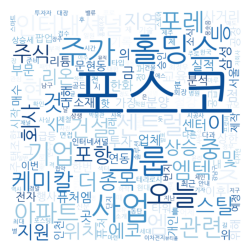

In [18]:
fig = plt.figure(figsize=(3, 3))  # 그림 크기 설정
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Clustering

## KoNLPy를 이용한 단어 분석
- 형태소 분석
 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
 - Kkma: 꼬꼬마. 서울대학교 IDS 연구실 개발
 - Komoran: 코모란. Shineware에서 개발
 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

##### Komoran를 활용하여 첫 번째 문장의 형태소를 분석 (Okt와 동일한 방식)

### CounterVectorizer 작동 예제

CountVectorizer: 단어들의 카운트(출현 빈도)로 문서를 벡터화 (단어는 모두 소문자로 변환시켜서 셈)

In [19]:
# example data
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

#### 1-gram (각 단어를 feature로)

##### countvectorizer 생성 및 학습

In [20]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X
# 4 문서 갯수 9: 단어 갯수

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [21]:
type(X)

scipy.sparse._csr.csr_matrix

- scipy.sparse.csr.csr_matrix: compressed spares row matrix
- toarray(): csr_mtrix를 dense ndarry representation으로 반환해주는 메소드

##### compressed sparse matrix를 array 형태로 변환

In [22]:
# 'This is the first document.', [0, 1, 1, 1, 0, 0, 1, 0, 1]
#  'This is the first document.',
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [23]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

##### 단어 출현 빈도 확인

In [24]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

### Countervectorizer with frequent noun

##### frequent 정의
noun_freq (2번 이상 사용된 명사들), komoran.nouns() 활용

In [25]:
over_2[:5] # 5번 이상 나온 word

['포스코', '팝업', '이번', '등', '수']

In [26]:
# 문장 --> tokenizer --> 명사만 남김
# 명사 중에서 전체 에서에서 2번 이상 나온 경우의 명사 남김
# 미리 2번 이상 나오는 단어 집합이 필요합니다. (noun_freq 를 미리 만들어야함)

noun_description = [] # 명사 블로그 글 (2번이상 쓰이는 명사만 사용 + 불용어 처리)
# [] <- [description의 명사 리스트] * len(descriptions)
for description in descriptions: # 원래 블로그 글
  desc_nouns_all = parser_kor.nouns(description)
  desc_nouns_over2 = [word for word in desc_nouns_all if word in over_2 and word not in removelist]
  noun_description.append(' '.join(desc_nouns_over2)) # 전체적으로 2번이상 사용된 명사만




In [27]:
print(noun_description[0])
print(noun_description[1])
print(noun_description[2])


팝업 이번 사실
그룹 주가 이후 급등 이후 하락 인터내셔널 그룹 가장
센트럴 포레 부적 격 세대 공급 안내 센트럴 포레 아파트 남구 문현동 번지 일원 위치 지역 주택조합 아파트 건설 예정


##### CountVectorizer에 커스텀 토크나이저 적용하여 countervectorize 생성 및 학습

In [28]:
# 문장 -> 벡터화 (TF-IDF) -> 비슷한 벡터끼리 모으기 --> 클러스터가 만들어짐
# TF-IDF 하려면 counter vecterizer를 만들어야함


vectorizer = CountVectorizer() # 한국어 pos, 명사, freq>2
X = vectorizer.fit_transform(noun_description) # 한국어를 잘하게 된다.
X
# 100 : 전체 document 수 ( 블로그 글 갯수)
# 395 : 명사, frequency 2 이상인 명사들의 집합

<100x161 sparse matrix of type '<class 'numpy.int64'>'
	with 609 stored elements in Compressed Sparse Row format>

##### feature names 확인 & compressed sparse matrix to array & 단어 출현 빈도 확인

In [29]:
vectorizer.get_feature_names_out()

array(['가장', '강남구', '개인', '건물', '건설', '골든', '공급', '공장', '관련', '관심', '교육',
       '규모', '그룹', '급등', '기록', '기술', '기업', '기자', '남구', '다과', '다른', '단지',
       '대장', '대한', '동탄', '디자인', '리온', '리튬', '마련', '마루', '매도', '매수', '면접',
       '문현동', '미래', '박물관', '발표', '배터리', '밸류', '번지', '병원', '보유', '부문',
       '부적', '분석', '분양', '사거리', '사무소', '사실', '사업', '사옥', '사진', '삼성', '상생',
       '상승', '상승세', '상한', '서울', '설명', '세대', '섹터', '센터', '센트럴', '소개', '소식',
       '소재', '솔루션', '스마트', '스토어', '스틸', '승인', '시간', '시공사', '시작', '신문',
       '실적', '아주', '아파트', '안내', '어제', '업체', '에스', '에코', '엠텍', '역사', '연동',
       '연수구', '예정', '오늘', '용솟음', '위치', '위해', '유튜브', '윤리', '이번', '이차전지',
       '이후', '인천', '인터내셔널', '인터네셔널', '일반', '일원', '자회사', '장주', '전자', '접수',
       '정도', '정말', '정보', '정부', '제작', '제주', '제철', '종목', '주가', '주로', '주식',
       '주택조합', '준비', '지구', '지난', '지역', '지원', '차트', '채널', '채용', '철강', '체인',
       '최근', '최대', '최정우', '캔커피', '케미칼', '타워', '타입', '테라로사', '투자', '투자자',
       '판매', '팝업', '패턴', '포레', '포스팅', '포항', '퓨처

In [30]:
X.toarray()[0] # 첫번째 블로그 글, 0 이 이미 많음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [31]:
vectorizer.vocabulary_

{'팝업': 139,
 '이번': 94,
 '사실': 48,
 '그룹': 12,
 '주가': 114,
 '이후': 96,
 '급등': 13,
 '하락': 148,
 '인터내셔널': 98,
 '가장': 0,
 '센트럴': 62,
 '포레': 141,
 '부적': 43,
 '세대': 59,
 '공급': 6,
 '안내': 78,
 '아파트': 77,
 '남구': 18,
 '문현동': 33,
 '번지': 39,
 '일원': 101,
 '위치': 90,
 '지역': 121,
 '주택조합': 117,
 '건설': 4,
 '예정': 87,
 '마루': 29,
 '정부': 109,
 '소개': 63,
 '시공사': 72,
 '사업': 49,
 '승인': 70,
 '오늘': 88,
 '접수': 105,
 '소식': 64,
 '분양': 45,
 '정보': 108,
 '연동': 85,
 '제주': 111,
 '병원': 40,
 '확인': 158,
 '엠텍': 83,
 '리튬': 27,
 '회사': 159,
 '기업': 16,
 '실적': 75,
 '미래': 34,
 '주식': 116,
 '퓨처엠': 145,
 '기록': 14,
 '스틸': 69,
 '리온': 26,
 '상한': 56,
 '홀딩스': 156,
 '케미칼': 132,
 '부문': 42,
 '소재': 65,
 '상승': 54,
 '인터네셔널': 99,
 '기술': 15,
 '분석': 44,
 '투자자': 137,
 '최근': 128,
 '에코': 82,
 '프로': 146,
 '개인': 2,
 '매수': 31,
 '섹터': 60,
 '철강': 126,
 '시간': 71,
 '위해': 91,
 '설명': 58,
 '한국': 150,
 '최대': 129,
 '건물': 3,
 '퓨처': 144,
 '패턴': 140,
 '대한': 23,
 '어제': 79,
 '종목': 113,
 '관련': 8,
 '전자': 104,
 '포스팅': 142,
 '한번': 151,
 '프로비': 147,
 '업체': 80,
 '상승세': 55,


## TF-IDF
어떤 단어의 빈도가 문서 내에서는 높은 편이 아니더라도, 해당 단어가 나타나는 문서가 적다면 문서를 대표하는 중요한 단어가 될 수 있음
![image.png](attachment:image.png)

##### tf-idf 학습

In [32]:
tfidf = TfidfTransformer()
# X " counter vectorize result"
X_tfidf = tfidf.fit_transform(X)

##### tf-idf 하기 전/후 비교

In [33]:
X.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [34]:
X_tfidf.toarray()[0] # 중요도를 곱해줌

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.57373419, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## clustering
- 텍스트를 벡터화 완료
- 벡터끼리의 연산 가능해짐


##### Spherical k-means
- sparse vector의 clustering을 위해 활용
- cosine distance 활용
- 모든 데이터 포인트를 unit vector가 되도록 변형해서 이용
- centroid로 한 군집에 포함된 모든 벡터의 평균을 사용하지 않고, 벡터의 합을 L2 normalize 하여 centroid를 unit vector로 만듦
- 특별한 initialize 방법 사용

This package is implementation of Improving spherical k-means for document clustering: Fast initialization, sparse centroid projection, and efficient cluster labeling (Kim et al., 2020).

##### spherical k-means 인스턴스 생성 및 학습
cluster 수 = 4

In [35]:
np.int = np.int32
kmeans = SphericalKMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_tfidf)
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 1, 3, 1, 3, 3, 0, 1, 3, 0,
       0, 3, 1, 1, 3, 3, 0, 0, 1, 1, 0, 3, 3, 1, 3, 1, 2, 3, 0, 0, 2, 2,
       0, 0, 0, 1, 0, 3, 2, 1, 3, 0, 2, 0, 1, 0, 3, 0, 1, 0, 0, 1, 0, 0,
       3, 0, 0, 0, 1, 0, 3, 3, 1, 3, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0,
       0, 3, 0, 0, 1, 1, 0, 3, 1, 0, 1, 1])

In [36]:
# descriptions, clustering 결과 dataframe 생성
df_descriptions = pd.DataFrame({"description": noun_description, "label": labels})
df_descriptions.head()

,description,label
0,팝업 이번 사실,0
1,그룹 주가 이후 급등 이후 하락 인터내셔널 그룹 가장,1
2,센트럴 포레 부적 격 세대 공급 안내 센트럴 포레 아파트 남구 문현동 번지 일원 위...,0
3,센트럴 포레 문현동 마루 아파트 정부 이후 지역 주택조합 아파트 센트럴 포레 소개,0
4,센트럴 포레 시공사 건설 사업 승인 사업 승인 오늘 센트럴 포레,0


##### 군집별 상위 10개의 최빈 단어 비교

In [37]:
nouns = []
for i in range(4):
    lists = df_descriptions.loc[df_descriptions["label"] == i, "description"].to_list()
    for sentence in lists:
        nouns += sentence.split()
    print(f"cluster{i}: {Counter(nouns).most_common(10)}")
    print("")

cluster0: [('센트럴', 13), ('포레', 13), ('아파트', 12), ('건설', 9), ('위치', 8), ('지역', 8), ('사업', 8), ('포항', 7), ('분양', 6), ('사거리', 6)]

cluster1: [('홀딩스', 17), ('그룹', 16), ('센트럴', 13), ('포레', 13), ('아파트', 12), ('오늘', 11), ('건설', 10), ('사업', 10), ('위치', 8), ('지역', 8)]

cluster2: [('홀딩스', 17), ('그룹', 17), ('센트럴', 13), ('포레', 13), ('오늘', 13), ('아파트', 12), ('사업', 11), ('건설', 10), ('관련', 10), ('엠텍', 9)]

cluster3: [('사업', 23), ('홀딩스', 23), ('그룹', 23), ('주가', 21), ('오늘', 17), ('기업', 15), ('센트럴', 13), ('포레', 13), ('아파트', 12), ('관련', 12)]



## 클러스터별 워드 클라우드

##### 워드클라우드 학습하는 함수 만들기

In [38]:
def get_wordcloud(texts):
    # 문장리스트를 받아와
    # 커스텀 토크나이저를 이용해 최소 2번 이상 출현한 명사들만 추출
    # Counter를 이용하여 명사별 빈도를 측정하고
    # wordcloud 학습
    wordcloud = WordCloud(
        font_path = './NanumGothic.ttf', #한글 사용 위해서
        background_color='white',       # 배경 색깔 정하기
        colormap = 'Accent_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
        width = 800, height = 800)
    texts = ' '.join(texts)
    nouns = texts.split()
    noun_counter = Counter(nouns)
    wordcloud.generate_from_frequencies(noun_counter)
    return wordcloud

##### 전체 데이터로 워드클라우드 만들기

In [39]:
wc = get_wordcloud(noun_description)

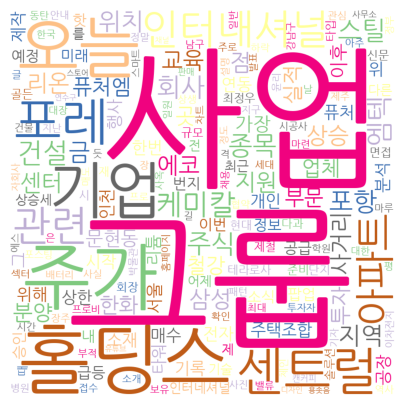

In [40]:
fig = plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

##### 클러스터별 워드클라우드 만들기

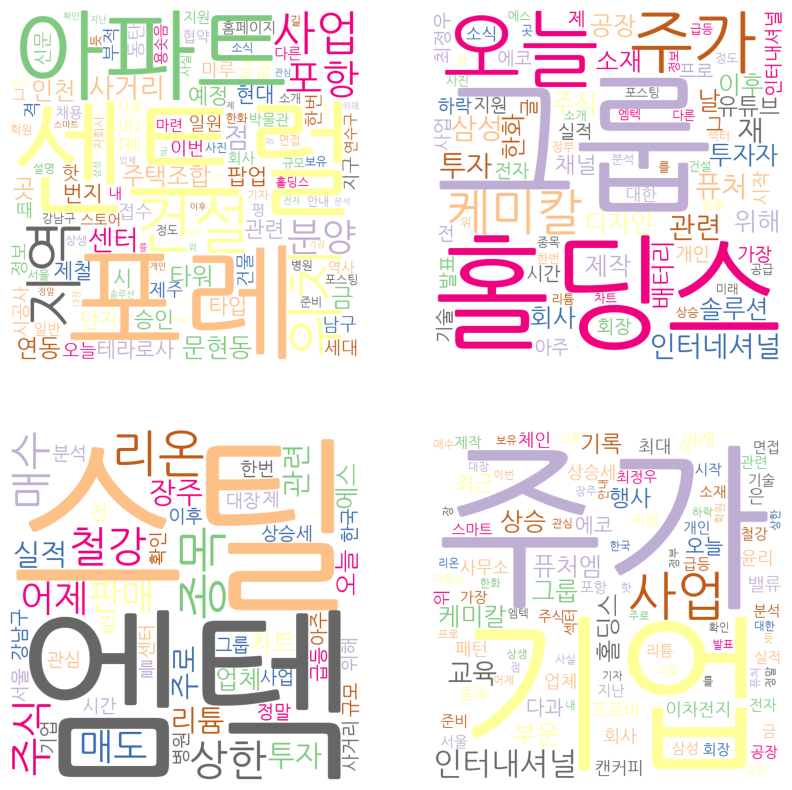

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    texts = df_descriptions.loc[df_descriptions['label']==i, "description"].to_list()
    wc = get_wordcloud(texts)
    axes[i//2, i%2].imshow(wc)
    axes[i//2, i%2].axis("off")
plt.show()